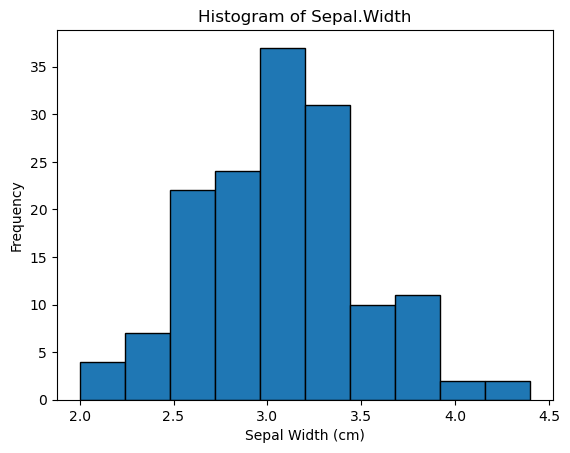

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
iris['Species'] = pd.Categorical.from_codes(iris_raw.target, iris_raw.target_names)

#PlantGrowthdataset
data = {
    "weight": [4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14,
               4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69,
               6.31,5.12,5.54,5.50,5.37,5.29,4.92,6.15,5.80,5.26],
    "group": ["ctrl"]*10 + ["trt1"]*10 + ["trt2"]*10
}
PlantGrowth = pd.DataFrame(data)

# 1a. Histogram of Sepal.Width
plt.hist(iris['sepal width (cm)'], bins=10, edgecolor='black')
plt.title('Histogram of Sepal.Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


In [2]:
# 1b & 1c. Mean vs Median
mean_sw = iris['sepal width (cm)'].mean()
median_sw = iris['sepal width (cm)'].median()
print(f"Mean Sepal.Width: {mean_sw:.3f}")
print(f"Median Sepal.Width: {median_sw:.3f}")

Mean Sepal.Width: 3.057
Median Sepal.Width: 3.000


In [3]:
# 1d. 27% of flowers higher than ___

threshold_27 = np.percentile(iris['sepal width (cm)'], 73)
print(f"27% of flowers have Sepal.Width higher than {threshold_27:.1f} cm")

27% of flowers have Sepal.Width higher than 3.3 cm


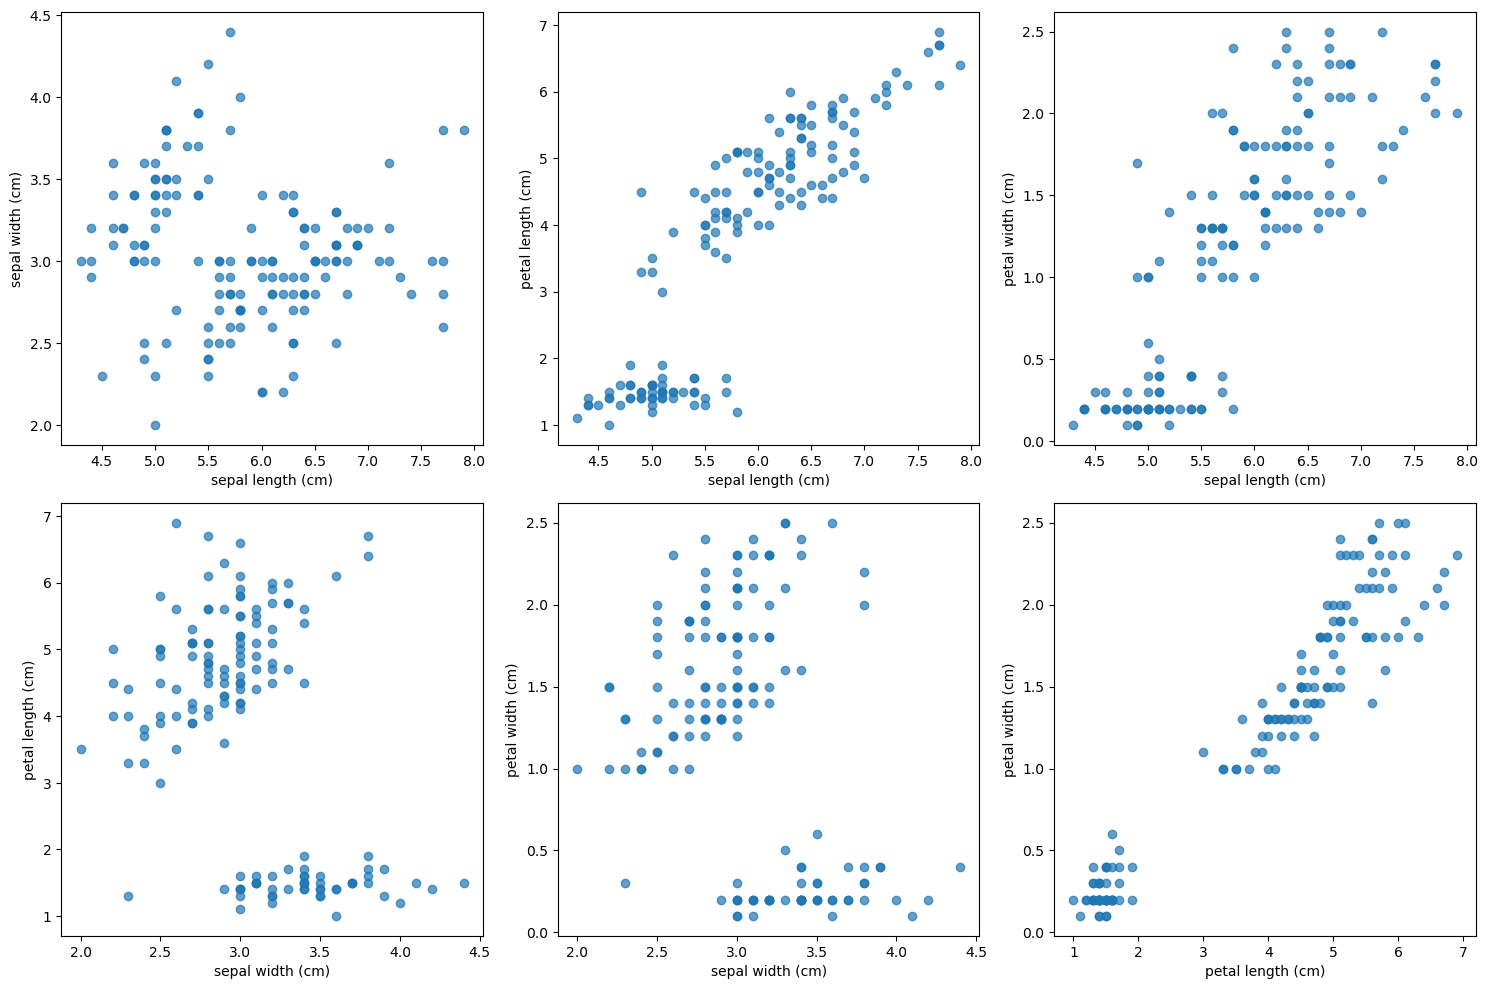

In [4]:
# 1e. Scatterplots of pairs of numerical variables
num_vars = iris.columns[:4]
pairs = [(i, j) for idx, i in enumerate(num_vars) for j in num_vars[idx+1:]]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, (x, y) in zip(axes.flat, pairs):
    ax.scatter(iris[x], iris[y], alpha=0.7)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.tight_layout()
plt.show()

In [5]:
# Determine strongest and weakest relationships using correlation
correlations = iris[num_vars].corr()
corr_pairs = correlations.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]
strongest = corr_pairs.abs().idxmax()
weakest = corr_pairs.abs().idxmin()
print(f"Strongest relationship: {strongest}")
print(f"Weakest relationship: {weakest}")

Strongest relationship: ('petal length (cm)', 'petal width (cm)')
Weakest relationship: ('sepal length (cm)', 'sepal width (cm)')


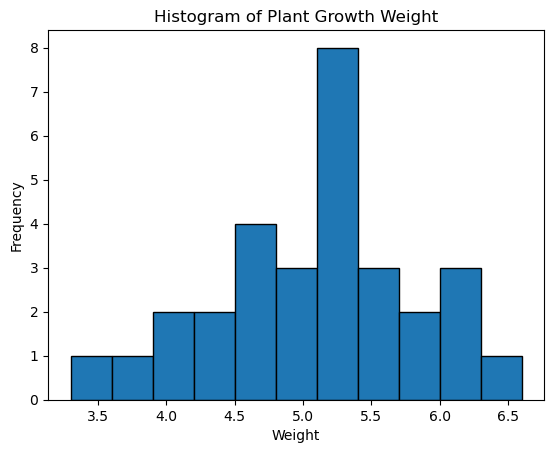

In [6]:
# 2a. Histogram of PlantGrowth weights
bins = np.arange(3.3, PlantGrowth['weight'].max() + 0.3, 0.3)
plt.hist(PlantGrowth['weight'], bins=bins, edgecolor='black')
plt.title('Histogram of Plant Growth Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

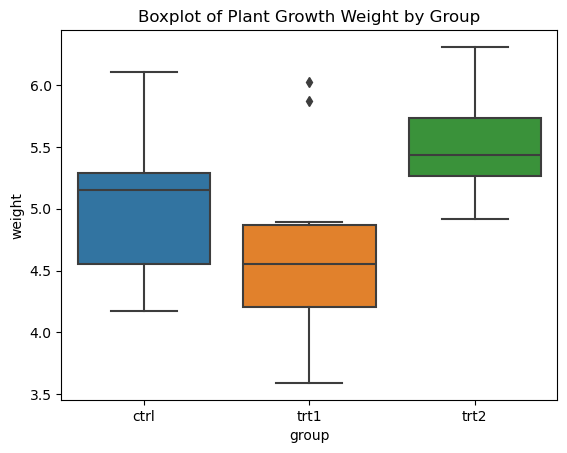

In [8]:
# 2b. Boxplots of weight by group
sns.boxplot(x='group', y='weight', data=PlantGrowth)
plt.title('Boxplot of Plant Growth Weight by Group')
plt.show()